In [2]:
import numpy as np
import tensorflow as tf
print("Tensorflow version", tf.__version__)
from tensorflow import keras
print("Keras version", keras.__version__)
import matplotlib.pyplot as plt

np.random.seed(42) 
tf.random.set_seed(42)

Tensorflow version 2.6.0
Keras version 2.6.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape)

(60000, 28, 28)


In [4]:
X_valid = X_train_full[:5000] / 255.
X_train = X_train_full[5000:] / 255.

y_valid = y_train_full[:5000] 
y_train = y_train_full[5000:]

X_test = X_test / 255.

Class label is: 4
Class name is: Coat


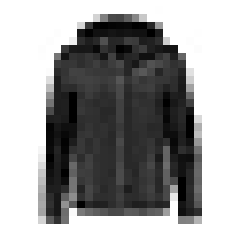

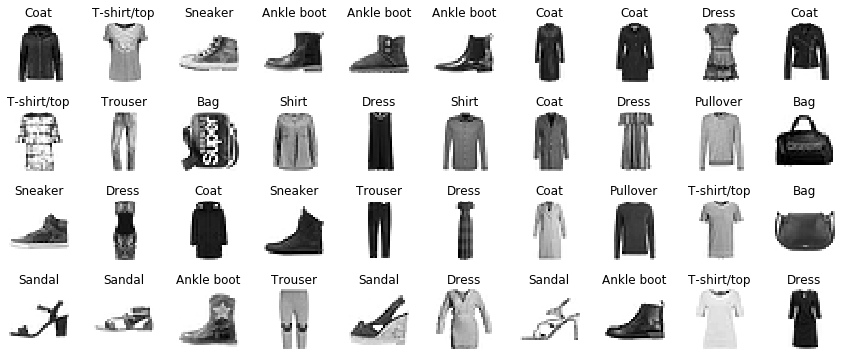

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print("Class label is:", y_train[0])
print("Class name is:", class_names[y_train[0]])
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

n_rows = 4
n_cols = 10
plt.figure(figsize=(15, 6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index],cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [6]:
keras.backend.clear_session()

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [8]:
model.layers

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


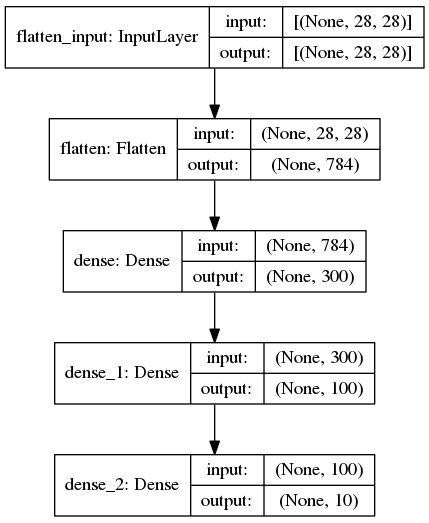

In [10]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", 
                       show_shapes=True)


In [11]:
sgd = keras.optimizers.SGD(learning_rate=0.01)

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
      optimizer=sgd,
      metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=5,
            validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4349 - val_accuracy: 0.8528
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4392 - accuracy: 0.8455 - val_loss: 0.5386 - val_accuracy: 0.7966
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4125 - accuracy: 0.8564 - val_loss: 0.3918 - val_accuracy: 0.8646
Epoch 5/5
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3941 - accuracy: 0.8619 - val_loss: 0.3753 - val_accuracy: 0.8678


In [17]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [18]:
hidden1 = model.layers[1]
print(hidden1.name)

dense


In [19]:
weights, biases = hidden1.get_weights() # getting the weights and biases
print(weights.shape, weights)
print(biases)

(784, 300) [[ 0.02446559 -0.00878417 -0.02189048 ... -0.02766209  0.03859142
  -0.06889391]
 [ 0.00475746 -0.03105844 -0.0586676  ...  0.00602096 -0.02763723
  -0.04165246]
 [-0.06206498 -0.06904786  0.07102538 ... -0.04240381  0.07121468
  -0.07330906]
 ...
 [-0.02958113  0.02147039 -0.05398395 ... -0.00197689  0.00189561
   0.05684309]
 [ 0.07097229 -0.0696874   0.07040311 ... -0.0042215  -0.00012463
   0.02924237]
 [-0.06020359  0.0157527  -0.02585295 ... -0.00527515  0.00260028
  -0.06793144]]
[ 1.01722695e-01  1.64560899e-02 -6.00632920e-04 -4.98835966e-02
  1.99023597e-02  2.77601611e-02  4.95932698e-02 -3.73189412e-02
 -4.77135647e-03  4.69930246e-02  2.92123854e-02  1.59547292e-02
  4.89670001e-02  9.53462627e-03  6.56890273e-02  6.64047673e-02
 -7.32062235e-02  5.96602671e-02  1.75081473e-02 -6.68100566e-02
  1.06116854e-01  5.46576530e-02 -9.50024277e-03  1.38779655e-02
  3.99622917e-02  2.96978354e-02 -6.41419832e-03  1.37549877e-01
  8.36832821e-02 -4.08330187e-03 -7.723897

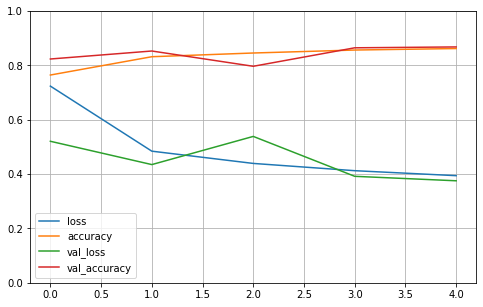

In [20]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4150 - accuracy: 0.8524


[0.4150441288948059, 0.852400004863739]

In [25]:
y_pred = np.argmax(model.predict(X_test[:3]), 1)
print(y_pred)
print([class_names[index] for index in y_pred])

[9 2 1]
['Ankle boot', 'Pullover', 'Trouser']


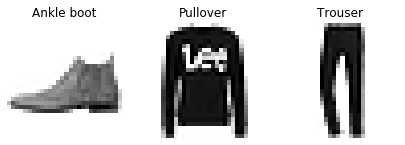

In [26]:
plt.figure(figsize=(7, 3))

for index, image in enumerate(X_test[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()